In [66]:
#Importamos las librerias necesarias:
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

from wordcloud import WordCloud

In [67]:
udemy = pd.read_csv("Datasets/Udemy.csv")

In [68]:
udemy.head(5)

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,subscribers_percent,segmento,reviews/subscribers
0,41295,Learn HTML5 Programming From Scratch,https://www.udemy.com/learn-html5-programming-...,False,0,268923,8629,45,All Levels,10.5,2013-02-14T07:03:41Z,Web Development,2.287,1,0.03209
1,59014,Coding for Entrepreneurs Basic,https://www.udemy.com/coding-for-entrepreneurs...,False,0,161029,279,27,Beginner Level,3.5,2013-06-09T15:51:55Z,Web Development,1.369,1,0.00173
2,625204,The Web Developer Bootcamp,https://www.udemy.com/the-web-developer-bootcamp/,True,200,121584,27445,342,All Levels,43.0,2015-11-02T21:13:27Z,Web Development,1.034,1,0.22573
3,173548,Build Your First Website in 1 Week with HTML5 ...,https://www.udemy.com/build-your-first-website...,False,0,120291,5924,30,Beginner Level,3.0,2014-04-08T16:21:30Z,Web Development,1.023,1,0.04925
4,764164,The Complete Web Developer Course 2.0,https://www.udemy.com/the-complete-web-develop...,True,200,114512,22412,304,All Levels,30.5,2016-03-08T22:28:36Z,Web Development,0.974,1,0.19572


In [69]:
#Para hacer un analisis de los segmentos:
#Seleccionamos las columnas relevantes para un primer analisis.

columnas = ["segmento","price", "reviews/subscribers","num_lectures", "content_duration"]

udemySegmentos = udemy[columnas]

In [70]:
#Para agrupar las filas:
#Agrupamos en base al segmento al que pertenecen y obtenemos una media de todas las demas variables.
udemySegmentos = udemySegmentos.groupby("segmento").mean()
udemySegmentos

,price,reviews/subscribers,num_lectures,content_duration
segmento,,,,
1,60.500000,0.088046,100.300000,11.800000
2,83.947368,0.084858,91.526316,10.210526
3,90.757576,0.057152,93.151515,11.081818
4,85.818182,0.040385,71.636364,6.353939
5,74.074074,0.033191,47.259259,5.491152
6,79.310345,0.036413,47.068966,5.429023
7,82.716763,0.036453,52.468208,5.639499
8,64.345455,0.036131,44.025455,4.704303
9,74.387160,0.037295,45.175097,4.492866


In [71]:
#Para ver la cantidad de elementos que pertenecen a cada segmento:
#Dado que en los primeros dos hay 29 elementos utilizaremos solo estos dos para el posterior analisis.
udemySegmentos['cantidad_elementos'] = udemy.groupby('segmento').size().values

udemySegmentos

,price,reviews/subscribers,num_lectures,content_duration,cantidad_elementos
segmento,,,,,
1,60.500000,0.088046,100.300000,11.800000,10
2,83.947368,0.084858,91.526316,10.210526,19
3,90.757576,0.057152,93.151515,11.081818,33
4,85.818182,0.040385,71.636364,6.353939,55
5,74.074074,0.033191,47.259259,5.491152,81
6,79.310345,0.036413,47.068966,5.429023,116
7,82.716763,0.036453,52.468208,5.639499,173
8,64.345455,0.036131,44.025455,4.704303,275
9,74.387160,0.037295,45.175097,4.492866,514


In [72]:
#Para resetear index:
#Con el fin de utilizar la columna segmento en las graficas.
udemySegmentos = udemySegmentos.reset_index()

Udemy: Comportamiento de las variables en los segmentos

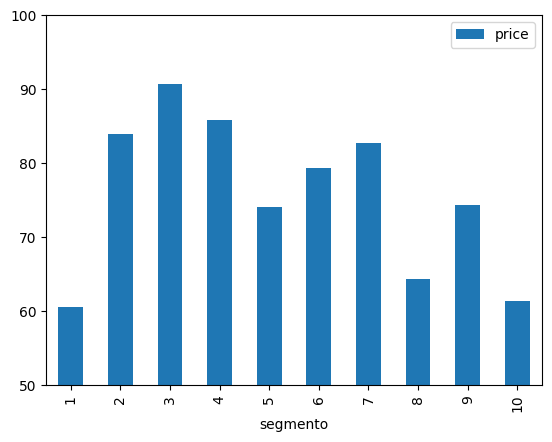

In [73]:
#Para ver el comportamiento de la variable price en cada segmento:
#Podemos ver que los cursos del segmento uno son economicos.
udemySegmentos.plot(x='segmento', y='price', kind='bar')

plt.ylim(50, 100)

plt.show()

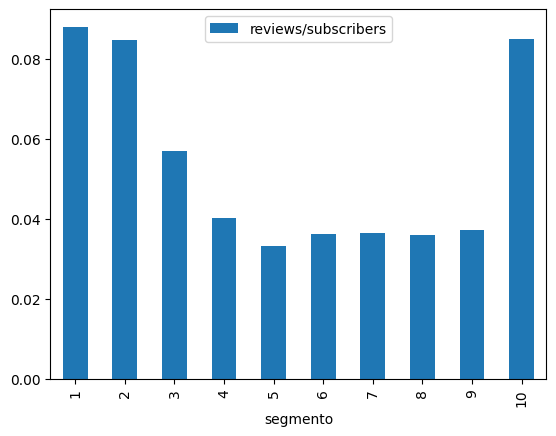

In [74]:
#Para ver el comportamiento de la variable reviews/subscribers en cada segmento:
#Los cursos mas exitosos tienden a tener mas numero de reviews en relacion al total de subscriptos.
#En el segmento 10 tambien se da que hay un numero alto de reviews en relacion a la cantidad de subscriptos.
udemySegmentos.plot(x='segmento', y='reviews/subscribers', kind='bar')

plt.show()

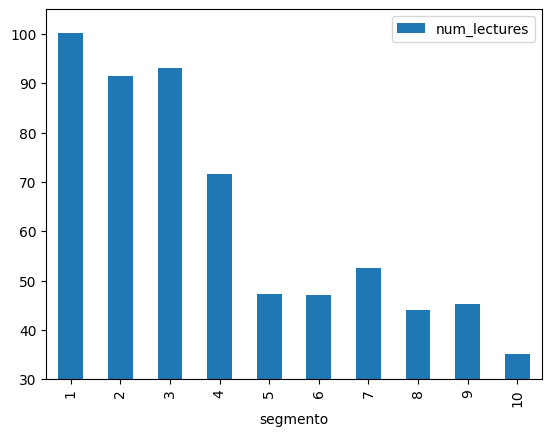

In [75]:
#Para ver el comportamiento de la variable num_lectures en cada segmento:
#Los cursos mas grandes en contenido, en este caso cantidad de lecciones, tienden a ser mas exitosos.
udemySegmentos.plot(x='segmento', y='num_lectures', kind='bar')

plt.ylim(30, 105)

plt.show()

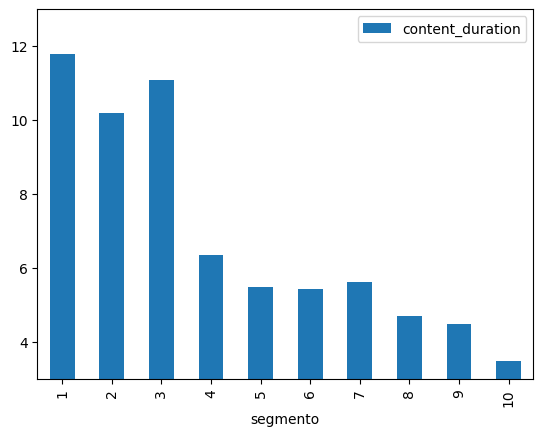

In [76]:
#Para ver el comportamiento de la variable content_duration en cada segmento:
#Los cursos mas cargados en contenido, en este caso en horas de clase, tienden a ser mas exitosos.
udemySegmentos.plot(x='segmento', y='content_duration', kind='bar')

plt.ylim(3, 13)

plt.show()

Udemy: Comportamiento de las variables categoricas en los primeros segmentos

In [77]:
#Para completar nuestro analisis con mas datos:
#Agregamos los valores de las columnas subjects y level.
udemySegmentos['subjects'] = udemy.groupby('segmento').agg({'subject': lambda x: ', '.join(sorted(set(x)))}).values
udemySegmentos['level'] = udemy.groupby('segmento').agg({'level': lambda x: ', '.join(sorted(set(x)))}).values

In [78]:
#Creamos un visualizador que nos permitira ver los valores de las variables de los dos primeros segmentos:
#Dado que entre los dos ya suman 29 elementos y es el tamaño de la muestra que estamos utilizando.
def visualizador(columna):
    print("Segmento 1: ", udemySegmentos[columna][0])
    print("Segmento 2: ", udemySegmentos[columna][1])

In [79]:
#Para visualizar la variable subjects:
#Vemos que el segmento uno lo ocupan cursos de instrumentos musicales y web development.
#En el segmento dos encontramos tambien a finanzas, diseño grafico.
visualizador("subjects")

Segmento 1:  Musical Instruments, Web Development
Segmento 2:  Business Finance, Graphic Design, Musical Instruments, Web Development


In [80]:
#Para visualizar la variable level:
#Los cursos mas exitosos son para principiantes o para todos los niveles.
visualizador("level")

Segmento 1:  All Levels, Beginner Level
Segmento 2:  All Levels, Beginner Level


Udemy: Titulos de los cursos mas exitosos

In [81]:
#Para visualizar los titulos de los cursos mas exitosos:
TitulosSegmento1 = []
TitulosSegmento2 = []

for i in range(len(udemy)):
    if udemy.loc[i, "segmento"] == 1:
        TitulosSegmento1.append(udemy.loc[i,"course_title"])
    if udemy.loc[i, "segmento"] == 2:
        TitulosSegmento2.append(udemy.loc[i,"course_title"])

In [82]:
#Para visualizar los titulos del segmento 1:
TitulosSegmento1

['Learn HTML5 Programming From Scratch',
 'Coding for Entrepreneurs Basic',
 'The Web Developer Bootcamp',
 'Build Your First Website in 1 Week with HTML5 and CSS3',
 'The Complete Web Developer Course 2.0',
 'Free Beginner Electric Guitar Lessons',
 'Web Design for Web Developers: Build Beautiful Websites!',
 'Learn Javascript & JQuery From Scratch',
 'Practical PHP: Master the Basics and Code Dynamic Websites',
 'JavaScript: Understanding the Weird Parts']

In [83]:
#Para visualizar los titulos del segmento 2:
TitulosSegmento2

['Pianoforall - Incredible New Way To Learn Piano & Keyboard',
 'Angular 4 (formerly Angular 2) - The Complete Guide',
 'Beginner Photoshop to HTML5 and CSS3',
 'Web Development By Doing: HTML / CSS From Scratch',
 'HTML and CSS for Beginners - Build a Website & Launch ONLINE',
 'Become a Web Developer from Scratch',
 'Bitcoin or How I Learned to Stop Worrying and Love Crypto',
 'Quickstart AngularJS',
 'Learn Responsive Web Development from Scratch',
 'Learn and Understand AngularJS',
 'Learn and Understand NodeJS',
 'The Complete HTML & CSS Course - From Novice To Professional',
 'Accounting in 60 Minutes - A Brief Introduction',
 'Complete PHP Course With Bootstrap3 CMS System & Admin Panel',
 "Photoshop In-Depth: Master all of Photoshop's Tools Easily",
 'Build Websites from Scratch with HTML & CSS',
 'Stock Market Investing for Beginners',
 'Modern React with Redux',
 'Learn PHP Fundamentals From Scratch']

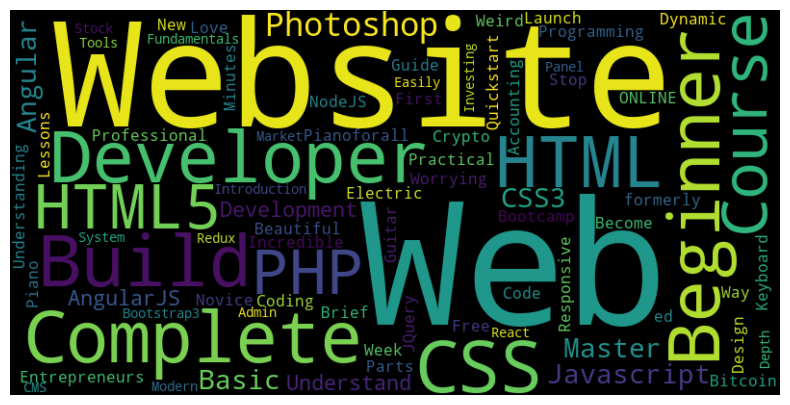

In [84]:
#Para crear una nube de palabras con los titulos:
texto = ' '.join(TitulosSegmento1 + TitulosSegmento2)

#Para eliminar palabras que se repiten y no hacen al contenido:
palabras_a_eliminar = ["Learn", "Scratch"]

for palabra in palabras_a_eliminar:
    texto = texto.replace(palabra, "")

# Para crear el objeto WordCloud y generar la nube de palabras
wordcloud = WordCloud(width=800, height=400).generate(texto)

# Para mostrar la nube de palabras utilizando Matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

#Vemos que en Udemy los cursos con mas suscripciones giran en torno principalmente a la programacion de paginas web

Udemy: Correlacion de variables

In [85]:
columnas2 = ["num_subscribers","price", "reviews/subscribers","num_lectures", "content_duration"]

udemyCorrelacion = udemy[columnas2]

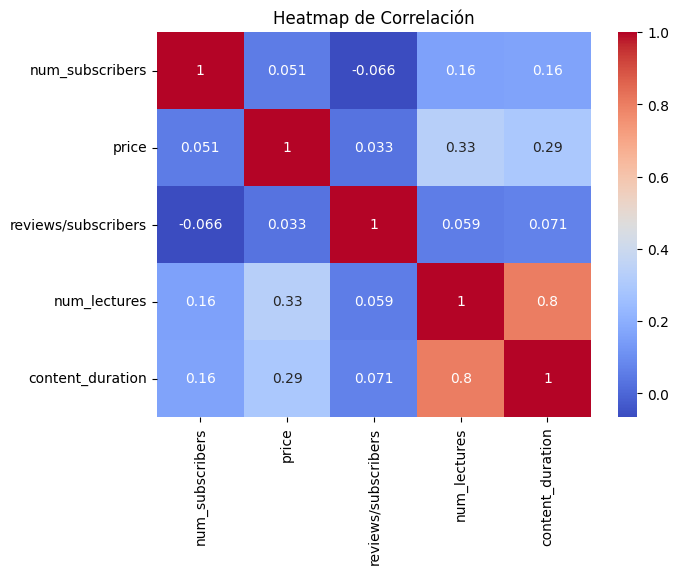

In [86]:
# Calcular la matriz de correlación
correlation_matrix = udemyCorrelacion.corr()

# Crear el heatmap
plt.figure(figsize=(7,5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Configurar el título del gráfico
plt.title('Heatmap de Correlación')

# Mostrar el gráfico
plt.show()

#Vemos que la correlacion de variables es baja, exceptuando las variables num_lectures y content_duration que estan intimamente relacionadas

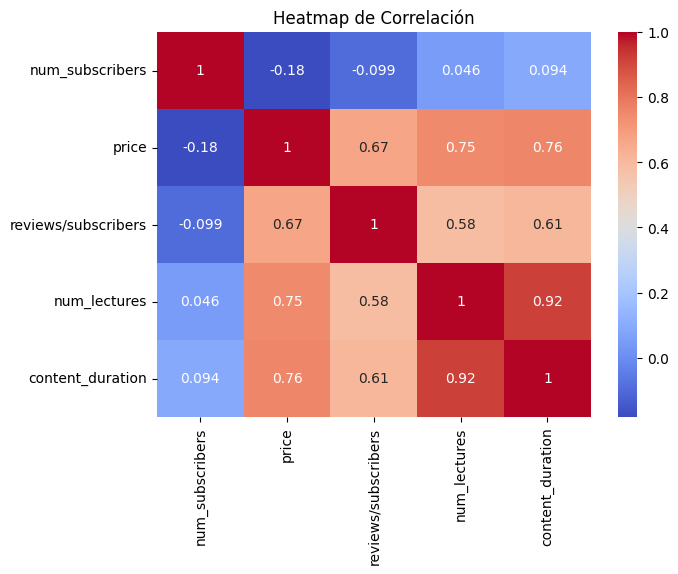

In [87]:
#Para generar una matriz de correlacion de los cursos mas exitosos:
segmentoObjetivo = udemy[udemy["segmento"].isin([1, 2])]

udemySegCorrelacion = segmentoObjetivo[columnas2]

# Calcular la matriz de correlación
correlation_matrix = udemySegCorrelacion.corr()

# Crear el heatmap
plt.figure(figsize=(7,5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Configurar el título del gráfico
plt.title('Heatmap de Correlación')

# Mostrar el gráfico
plt.show()

#Vemos que en este grafico hay muchas correlaciones altas, entre precio y cantidad de contenido,
#precio y cantidad de reviews y entre cantidad de reviews y cantidad de contenido

Udemy: Categorias mas importantes en variables categoricas

In [88]:
#Para ver cuales son los temas de los cursos mas importantes: 
SumSubj = udemy.groupby("subject")["num_subscribers"].sum()

PromSubj = (udemy.groupby("subject")["num_subscribers"].mean()).round(2)

CountSubj = udemy["subject"].value_counts()

CountSubj = CountSubj.sort_index()

Subjects = pd.DataFrame({"Subject": SumSubj.index, "SumatoriaEnrolled": SumSubj.values, "PromedioEnrolled": PromSubj.values,"CountCursos": CountSubj.values})

In [89]:
#Web Development es el tema mas importante, tanto en sumatoria como en promedio.
Subjects.sort_values("SumatoriaEnrolled", ascending=False).head(5)

,Subject,SumatoriaEnrolled,PromedioEnrolled,CountCursos
3,Web Development,7980572,6650.48,1200
0,Business Finance,1868711,1563.77,1195
1,Graphic Design,1063148,1763.10,603
2,Musical Instruments,846689,1245.13,680


In [90]:
#Para ver cuales son los niveles mas importantes: 
SumLevel = udemy.groupby("level")["num_subscribers"].sum()

PromLevel = (udemy.groupby("level")["num_subscribers"].mean()).round(2)

CountLevel = udemy["subject"].value_counts()

CountLevel = CountLevel.sort_index()

Level = pd.DataFrame({"Subject": SumLevel.index, "SumatoriaEnrolled": SumLevel.values, "PromedioEnrolled": PromLevel.values,"CountCursos": CountLevel.values})

In [91]:
#Los cursos aptos para todos los niveles son los mas exitosos, seguidos por los que son para principiantes.
Level.sort_values("SumatoriaEnrolled", ascending=False).head(5)

,Subject,SumatoriaEnrolled,PromedioEnrolled,CountCursos
0,All Levels,6915076,3584.80,1195
1,Beginner Level,4051843,3190.43,603
3,Intermediate Level,742005,1762.48,1200
2,Expert Level,50196,865.45,680


Udemy: Series de tiempo

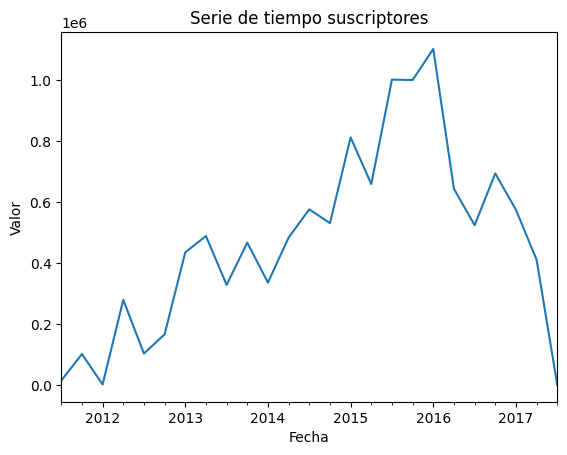

In [92]:
#Para ver una serie de tiempo del comportamiento de los suscriptores:
udemy["published_timestamp"] = pd.to_datetime(udemy["published_timestamp"])

udemy.set_index('published_timestamp', inplace=True)

#Para resamplear por trimestre:
udemyTrimeste = udemy.resample('Q').sum(numeric_only=True)

#Para generar la serie de tiempo:
udemyTrimeste['num_subscribers'].plot()
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.title('Serie de tiempo suscriptores')
plt.show()

In [93]:
#Para crear una serie de tiempo agrupando por subject:
udemySubjectCronologia = udemy.groupby(['subject', 'published_timestamp']).sum(numeric_only=True).reset_index()

udemySubjectPivot = udemySubjectCronologia.pivot(index='published_timestamp', columns='subject', values='num_subscribers')

udemySubjectPivotQ = udemySubjectPivot.resample('Q').sum()

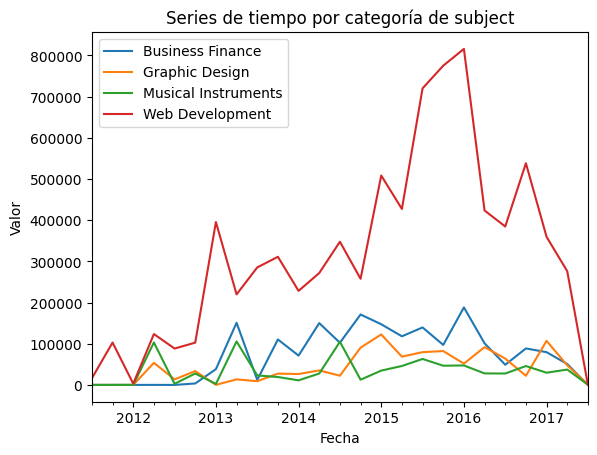

In [94]:
#Para ver una serie de tiempo del comportamiento de los suscriptores de cada categoria de subject:
udemySubjectPivotQ.plot()
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.title('Series de tiempo por categoría de subject')
plt.legend()
plt.show()

In [95]:
#Para generar una columna con los ingresos de cada curso:
udemyTrimeste["ingresos"] = udemyTrimeste["price"]*udemyTrimeste["num_subscribers"]

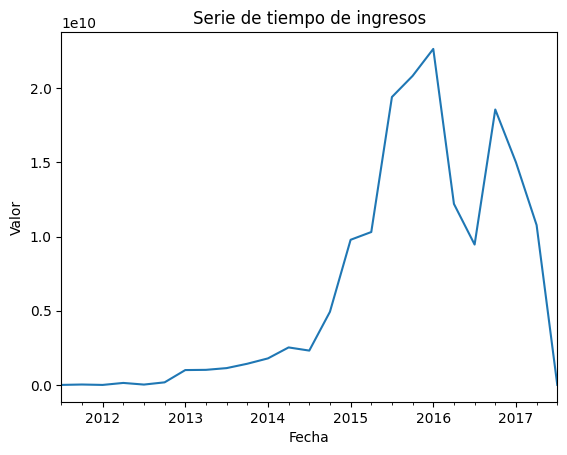

In [96]:
#Para generar la serie de tiempo de ingresos en udemy:
udemyTrimeste['ingresos'].plot()
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.title('Serie de tiempo de ingresos')
plt.show()